In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from src.tennis_script import *

In [45]:
serve_data = pd.read_csv('data/serve_times.txt')

In [46]:
serve_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     120 non-null    object
 1   seconds_before_next_point  120 non-null    int64 
 2   day                        120 non-null    object
 3   opponent                   120 non-null    object
 4   game_score                 120 non-null    object
 5   set                        120 non-null    int64 
 6   game                       120 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


In [47]:
serve_data.head(20)

,server,seconds_before_next_point,day,opponent,game_score,set,game
0,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0
1,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0
2,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0
3,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0
4,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0
5,Pablo Andujar,34,28-May-15,Philipp Kohlschreiber,40-30,5,2-4
6,Bernard Tomic,21,28-May-15,Thanasi Kokkinakis,30-40,3,0-1
7,Bernard Tomic,17,28-May-15,Thanasi Kokkinakis,Deuce,3,0-1
8,Bernard Tomic,17,28-May-15,Thanasi Kokkinakis,Ad-in,3,0-1
9,Rafael Nadal,34,28-May-15,Nicolas Almagro,15-30,1,0-1


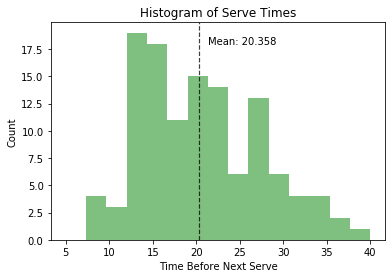

In [7]:
#Distribution of Serve Times
serve_time_mean = np.mean(serve_data['seconds_before_next_point'])
fig, ax = plt.subplots()
ax.hist(serve_data['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(serve_time_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(serve_time_mean * 1.05, ymax * .9, f'Mean: {round(serve_time_mean,3)}')
ax.set_title('Histogram of Serve Times')
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

In [8]:
#create boolean indexes for high-pressure and not high-pressure points
bool_index_40 = serve_data['game_score'].str.contains('40')
bool_index_ad = serve_data['game_score'].str.contains('Ad')

not_bool_index_40 = pd.Series([not opp for opp in bool_index_40])
not_bool_index_ad = pd.Series([not opp for opp in bool_index_ad])

In [9]:
#DataFrame consisting of only high pressure points
hp_data = serve_data[bool_index_40 | bool_index_ad]

In [10]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     57 non-null     object
 1   seconds_before_next_point  57 non-null     int64 
 2   day                        57 non-null     object
 3   opponent                   57 non-null     object
 4   game_score                 57 non-null     object
 5   set                        57 non-null     int64 
 6   game                       57 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.6+ KB


In [11]:
#DataFrame consisting of only not high-pressure points
not_hp_data = serve_data[not_bool_index_40 & not_bool_index_ad]
not_hp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 118
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     63 non-null     object
 1   seconds_before_next_point  63 non-null     int64 
 2   day                        63 non-null     object
 3   opponent                   63 non-null     object
 4   game_score                 63 non-null     object
 5   set                        63 non-null     int64 
 6   game                       63 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.9+ KB


In [12]:
#avg time between all points
serve_time_mean

20.358333333333334

In [13]:
#avg time before high-pressure point
hp_time_mean = np.mean(hp_data['seconds_before_next_point'])
hp_time_mean

21.263157894736842

In [14]:
#avg time before not high-pressure point
not_hp_time_mean = np.mean(not_hp_data['seconds_before_next_point'])
not_hp_time_mean

19.53968253968254

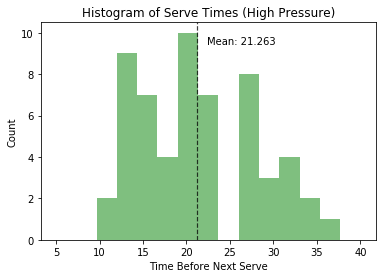

In [15]:
fig, ax = plt.subplots()
ax.hist(hp_data['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(hp_time_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(hp_time_mean * 1.05, ymax * .9, f'Mean: {round(hp_time_mean,3)}')
ax.set_title("Histogram of Serve Times (High Pressure)")
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

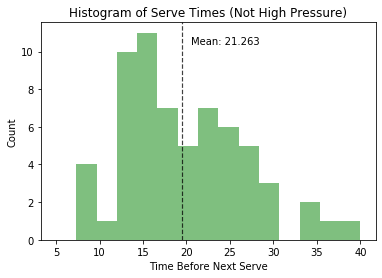

In [16]:
fig, ax = plt.subplots()
ax.hist(not_hp_data['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(not_hp_time_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(not_hp_time_mean * 1.05, ymax * .9, f'Mean: {round(hp_time_mean,3)}')
ax.set_title("Histogram of Serve Times (Not High Pressure)")
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

Text(0.5, 0, 'Time Before Next Point')

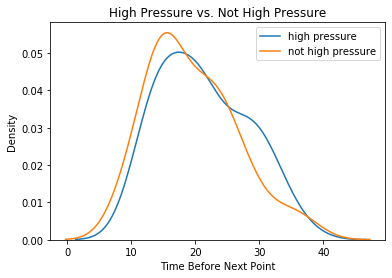

In [37]:
#Comparing Density Curves of High and Not High Pressure Points

sns.distplot(hp_data['seconds_before_next_point'], hist = False, label = 'high pressure')
sns.distplot(not_hp_data['seconds_before_next_point'], hist = False, label = 'not high pressure')
plt.title('High Pressure vs. Not High Pressure')
plt.ylabel('Density')
plt.xlabel('Time Before Next Point')

In [17]:
#Find avg time before serve for grouped by score
time_per_score = serve_data[['seconds_before_next_point','game_score']].groupby('game_score').aggregate(np.mean)
score_index = ['0-15', '0-30', '15-0', '15-15', '15-30', '30-0',
       '30-15', '30-30', 'Deuce', '40-0', '40-15', '40-30', 'Ad-in','30-40','15-40','0-40', 'Ad-out'
       ]

score_counts = [sum(serve_data['game_score'] == score) for score in score_index]
score_counts_norm = [float(i)/max(score_counts) for i in score_counts]

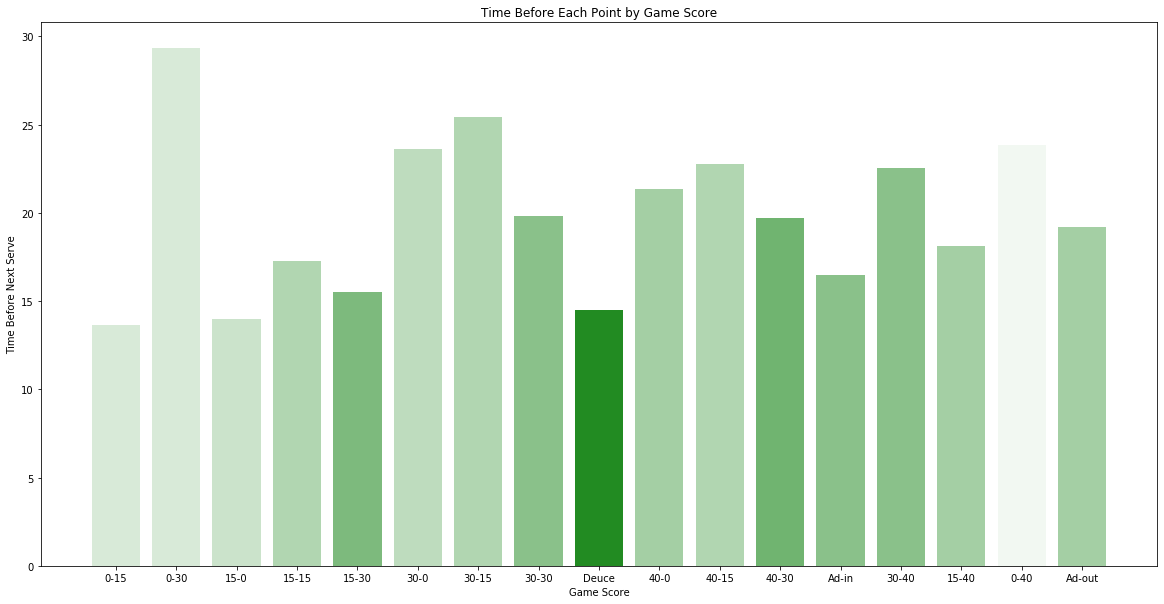

In [18]:
#bar graph of avg time between points for each game score, shaded by number of times per point
fig, ax = plt.subplots(figsize = (20, 10))
for i in range(len(score_index)):
    ax.bar(score_index[i], time_per_score['seconds_before_next_point'][i], alpha = score_counts_norm[i], color = 'forestgreen')
ax.set_xlabel('Game Score')
ax.set_ylabel('Time Before Next Serve')
ax.set_title('Time Before Each Point by Game Score');

In [19]:
#split high-pressure points by about to win or about to lose
about_to_lose_idx = ['30-40', '15-40','0-40', 'Ad-out']
about_to_win_idx = ['40-0', '40-15', '40-30', 'Ad-in']

bool_about_to_lose = pd.Series([True if item in about_to_lose_idx else False for item in serve_data['game_score']])
bool_about_to_win = pd.Series([True if item in about_to_win_idx else False for item in serve_data['game_score']])

about_to_lose_df = serve_data[bool_about_to_lose]
about_to_win_df = serve_data[bool_about_to_win]

about_to_lose_df.info()
about_to_win_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     24 non-null     object
 1   seconds_before_next_point  24 non-null     int64 
 2   day                        24 non-null     object
 3   opponent                   24 non-null     object
 4   game_score                 24 non-null     object
 5   set                        24 non-null     int64 
 6   game                       24 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 4 to 117
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     33 non-null     object
 1   seconds_before_next_point  33 non-null     int64 
 2   day                     

In [20]:
#avg time before next point if server is about to lose game
about_to_lose_mean = np.mean(about_to_lose_df['seconds_before_next_point'])

In [21]:
#avg time before next point if server is about to win
about_to_win_mean = np.mean(about_to_win_df['seconds_before_next_point'])

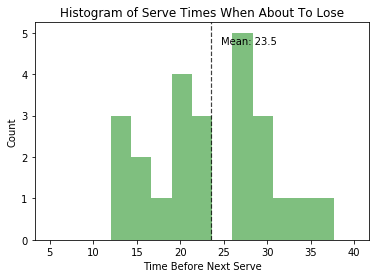

In [22]:
fig, ax = plt.subplots()
ax.hist(about_to_lose_df['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(about_to_lose_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(about_to_lose_mean * 1.05, ymax * .9, f'Mean: {round(about_to_lose_mean,3)}')
ax.set_title('Histogram of Serve Times When About To Lose')
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

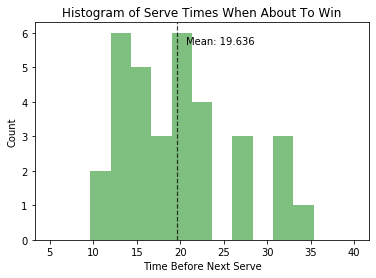

In [23]:
fig, ax = plt.subplots()
ax.hist(about_to_win_df['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(about_to_win_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(about_to_win_mean * 1.05, ymax * .9, f'Mean: {round(about_to_win_mean,3)}')
ax.set_title('Histogram of Serve Times When About To Win')
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

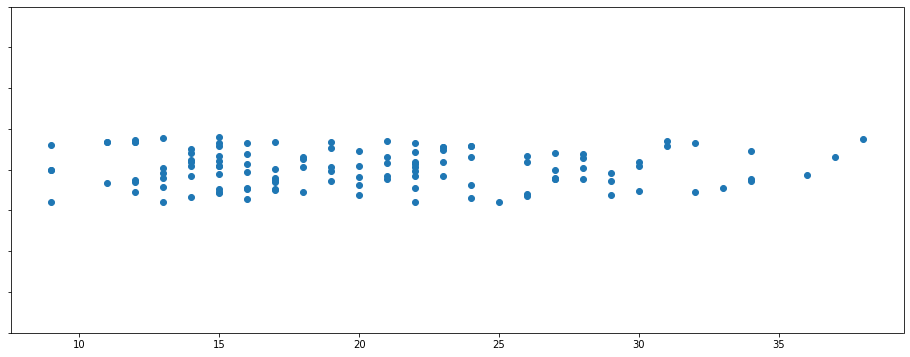

In [54]:
fig, axs = plt.subplots(figsize = (16,6), sharex = True)

one_dim_scatterplot(serve_data['seconds_before_next_point'], axs)

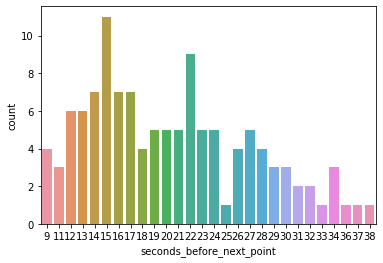

In [76]:
#Poisson Distribution

dist = stats.poisson(mu = serve_time_mean)


sns.countplot(serve_data['seconds_before_next_point'])
skew_ = stats.skew(serve_data['seconds_before_next_point'])

Null Hypothesis: There is difference between time before serve high pressure points and low pressure points (mean = 19.5)

Alternative Hypothesis: The time before serve is greater for high pressure points than low pressure points (mean > 19.5)

In [124]:
a, loc, scale = stats.skewnorm.fit(serve_data['seconds_before_next_point'])
loc_hp, scale_hp = stats.norm.fit(hp_data['seconds_before_next_point'])
a_nhp, loc_nhp, scale_nhp = stats.skewnorm.fit(not_hp_data['seconds_before_next_point'])

hp_dist = stats.norm(loc_hp, scale_hp)
not_hp_skew_dist = stats.skewnorm(a_nhp, loc_nhp, scale_nhp)
loc_hp, scale_hp

(21.263157894736842, 6.783691268084308)

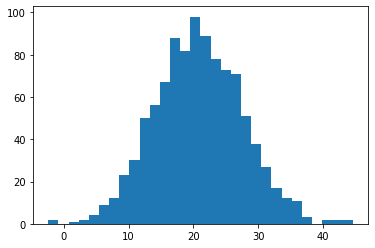

In [125]:
skew_dist = stats.skewnorm(a, loc, scale)

plt.hist(hp_dist.rvs(1000), bins = 30);

0.6532031479201338